<div align="middle", style="font-size:200%">
     <font color="#9bddff">
          <b>Capstone Project</b>

<div align="middle", style="font-size:100%">
     <font color="#f08080">
          <b> Data Description </b>

- sku - Random ID for the product

- national_inv - Current inventory level for the part

- lead_time - Transit time for product (if available)

- in_transit_qty - Amount of product in transit from source

- forecast_3_month - Forecast sales for the next 3 months

- forecast_6_month - Forecast sales for the next 6 months

- forecast_9_month - Forecast sales for the next 9 months

- sales_1_month - Sales quantity for the prior 1 month time period

- sales_3_month - Sales quantity for the prior 3 month time period

- sales_6_month - Sales quantity for the prior 6 month time period

- sales_9_month - Sales quantity for the prior 9 month time period

- min_bank - Minimum recommend amount to stock

- potential_issue - Source issue for part identified

- pieces_past_due - Parts overdue from source

- perf_6_month_avg - Source performance for prior 6 month period

- perf_12_month_avg - Source performance for prior 12 month period

- local_bo_qty - Amount of stock orders overdue

- deck_risk - Part risk flag

- oe_constraint - Part risk flag

- ppap_risk - Part risk flag

- stop_auto_buy - Part risk flag

- rev_stop - Part risk flag

- went_on_backorder - Product actually went on backorder. This is the target value.

Importing The Libraries 

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['figure.figsize'] = (10,8)
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

pd.set_option('display.max_columns',100)

pd.set_option('display.max_rows',500)

In [174]:
plt.style.use("ggplot")

- Importing Train & Test Dataset

In [175]:
train = pd.read_csv('Kaggle_Training_Dataset_v2.csv')

In [176]:
test = pd.read_csv('Kaggle_Test_Dataset_v2.csv')
test_target = test["went_on_backorder"]
test_ind = test.drop("went_on_backorder",1)

In [177]:
train.went_on_backorder.value_counts(normalize=True)*100

No     99.330928
Yes     0.669072
Name: went_on_backorder, dtype: float64

In [178]:
test.went_on_backorder.value_counts(normalize=True)*100

No     98.8896
Yes     1.1104
Name: went_on_backorder, dtype: float64

- Shape of the Train & Test Dataset

In [179]:
train.shape, test_ind.shape

((1687861, 23), (242076, 22))

- Describing Training Numerical Datatype

In [180]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


Describing Test Numerical Datatype

In [181]:
test_ind.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,242075.0,499.751028,29280.390793,-25414.0,4.00,15.00,81.00,12145792.0
lead_time,227351.0,7.923018,7.041410,0.0,4.00,8.00,9.00,52.0
in_transit_qty,242075.0,36.178213,898.673127,0.0,0.00,0.00,0.00,265272.0
forecast_3_month,242075.0,181.472345,5648.874620,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,242075.0,348.807304,10081.797119,0.0,0.00,0.00,12.00,2157024.0
forecast_9_month,242075.0,508.296301,14109.723787,0.0,0.00,0.00,20.00,3162260.0
sales_1_month,242075.0,51.478195,1544.678350,0.0,0.00,0.00,4.00,349620.0
sales_3_month,242075.0,172.139316,5164.243624,0.0,0.00,1.00,14.00,1099852.0
sales_6_month,242075.0,340.425414,9386.523492,0.0,0.00,2.00,30.00,2103389.0
sales_9_month,242075.0,511.775446,13976.702192,0.0,0.00,4.00,46.00,3195211.0


Describing Training Categorical Datatype

In [182]:
train.describe(exclude=np.number).T

,count,unique,top,freq
sku,1687861,1687861,1026827,1
potential_issue,1687860,2,No,1686953
deck_risk,1687860,2,No,1300377
oe_constraint,1687860,2,No,1687615
ppap_risk,1687860,2,No,1484026
stop_auto_buy,1687860,2,Yes,1626774
rev_stop,1687860,2,No,1687129
went_on_backorder,1687860,2,No,1676567


Describing Test Categorical Datatype

In [183]:
test_ind.describe(exclude=np.number).T

,count,unique,top,freq
sku,242076,242076,3285085,1
potential_issue,242075,2,No,241993
deck_risk,242075,2,No,194105
oe_constraint,242075,2,No,242028
ppap_risk,242075,2,No,213357
stop_auto_buy,242075,2,Yes,232617
rev_stop,242075,2,No,241967


- Train & Test DataFrame

In [184]:
train.tail(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
test_ind.tail(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows with less than two non-null values

In [186]:
train = train.dropna(thresh=2)

In [187]:
test_ind = test_ind.dropna(thresh=2)

- Proportion of the Train Dataset

In [188]:
train.went_on_backorder.value_counts(normalize=True)*100

No     99.330928
Yes     0.669072
Name: went_on_backorder, dtype: float64

- Proportion of the Test Dataset

In [189]:
test.went_on_backorder.value_counts(normalize=True)*100

No     98.8896
Yes     1.1104
Name: went_on_backorder, dtype: float64

### Combining Train and Test Dataset.

In [190]:
combined = pd.concat([train,test_ind],ignore_index=True)

In [191]:
combined.head(4)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No


- Checking the Shape of the Dataset

In [192]:
combined.shape

(1929935, 23)

In [193]:
combined.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929935 entries, 0 to 1929934
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1929935 non-null  object 
 1   national_inv       1929935 non-null  float64
 2   lead_time          1814318 non-null  float64
 3   in_transit_qty     1929935 non-null  float64
 4   forecast_3_month   1929935 non-null  float64
 5   forecast_6_month   1929935 non-null  float64
 6   forecast_9_month   1929935 non-null  float64
 7   sales_1_month      1929935 non-null  float64
 8   sales_3_month      1929935 non-null  float64
 9   sales_6_month      1929935 non-null  float64
 10  sales_9_month      1929935 non-null  float64
 11  min_bank           1929935 non-null  float64
 12  potential_issue    1929935 non-null  object 
 13  pieces_past_due    1929935 non-null  float64
 14  perf_6_month_avg   1929935 non-null  float64
 15  perf_12_month_avg  1929935 non-n

### In here SKU is Stock Keeping Unit in Encoding of What are Products and Product_Ids But We Don't Have Common Key to Decode the SKU Column So That We Drop it Because It Does not Give Information to Out For Further Analysis

In [194]:
combined['Prod_Id']  = list(map(lambda x: int(str(x)[:3]) ,combined.sku))

In [195]:
combined_df = combined.drop(['sku','Prod_Id'],axis=1)

In [196]:
combined_df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [197]:
combined_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855851,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [198]:
combined_df.describe(include=np.object).T

,count,unique,top,freq
potential_issue,1929935,2,No,1928946
deck_risk,1929935,2,No,1494482
oe_constraint,1929935,2,No,1929643
ppap_risk,1929935,2,No,1697383
stop_auto_buy,1929935,2,Yes,1859391
rev_stop,1929935,2,No,1929096
went_on_backorder,1687860,2,No,1676567


In [199]:
combined_df.isnull().sum()[combined_df.isnull().sum()!=0]

lead_time            115617
went_on_backorder    242075
dtype: int64

In [200]:

# combined_df.head()

# - Separating ['lead_time','in_transit_qty','local_bo_qty','min_bank'] columns for analysis 
# to check if they are of any help in making new features
# sep = combined_df[['lead_time','in_transit_qty','local_bo_qty','min_bank']]
# sep.loc[(sep.min_bank > 0)]
# sep.describe().T
# Feats = [ 'High Demand'  if i > j  else 'No Demand' if i < (j+100) else 'To Be Demand'  for i,j  in zip(combined_df['min_bank'],combined_df['in_transit_qty']) ]
# pd.Series(Feats).value_counts(normalize=True)*100
# combined_df.head(5)

## Feature Engineering 

Shortage In Inventory:


- In National Inv We Creating New Feature Called Shortage_in_Inventory It has Shortage in  Inventory  or Not :

        Basically We Creating Variance on the Dataset What if Shortage Happens That Causes Back Order or Not and It Gives Additional Information of Data


Basic Idea :   ` back['shortage'] = list(map(lambda x: 1  if x < 0 else 0 ,back['national_inv']))`

In [201]:
combined_df['shortage'] = (list(map(lambda x: 1  if x < 0 else 0 ,combined_df['national_inv'])))

In [202]:
combined_df.loc[combined_df.shortage == 1]['went_on_backorder'].value_counts(normalize=True)*100

No     84.884511
Yes    15.115489
Name: went_on_backorder, dtype: float64

Demand in Inventory,


There 2 Features Called In-Transit-qty and  Min-Bank 

   - In_Transit_Qty Feature Defines that Amount Goods Are Coming to the Inventory In Short Period 
    
   - Min_Bank Feature Defined That Minimum Amount  Goods Required/Expected in the Inventory
    

    

In [203]:
combined_df['Demand'] = (list(map(lambda x,y: 'High Demand'  if x > y  else 'Demand Anticipated' if (y - x) < 100 | (y == x )  else'No Demand' , combined_df['min_bank'],combined_df['in_transit_qty'])))


In [204]:
combined_df.Demand.value_counts(normalize=True)*100

Demand Anticipated    55.878721
High Demand           42.740300
No Demand              1.380979
Name: Demand, dtype: float64

### Introducing Sales Avg By Feature Engineering and Droping Sales Parition Columns 

In [205]:
Avg = combined_df.copy()

In [206]:
A = combined_df['sales_1_month'] + combined_df['sales_3_month'] + combined_df['sales_6_month']

B = combined_df['sales_9_month']

sales = (A+B)/2

In [207]:
Avg.insert(loc=4, value=sales, column='Sales_Avg')

In [208]:
scol = [ i for i in Avg.select_dtypes(np.number).columns if i.startswith('s')]

In [209]:
scol

['sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'shortage']

In [210]:
scol.remove('shortage')

In [211]:
Avg.drop(scol,axis=1,inplace=True)

In [212]:
Avg.head(3)

,national_inv,lead_time,in_transit_qty,forecast_3_month,Sales_Avg,forecast_6_month,forecast_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No,0,Demand Anticipated
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No,0,Demand Anticipated
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No,0,Demand Anticipated





### Introducing Forecast Avg By Feature Engineering and Dropping Forecast Parition Columns 




In [213]:
scol

['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']

In [214]:
A = combined_df['forecast_3_month'] + combined_df['forecast_6_month']

B = combined_df['forecast_9_month']

forecast = (A+B)/2

In [215]:
Avg.insert(loc=5,value=forecast,column='Forecast_Avg')

In [216]:
fcol = [ i for i in Avg.select_dtypes(np.number).columns if i.startswith('f')]

In [217]:
Avg.drop(fcol,axis=1,inplace=True) 

In [218]:
Avg.head(3)

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand
0,0.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No,0,Demand Anticipated
1,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No,0,Demand Anticipated
2,2.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No,0,Demand Anticipated


### Introducing Performance column

In [219]:
Avg['Performance'] =  list(map(lambda x,y:  'Same'  if x==y else 'High' if x < y else 'Low' ,combined_df.perf_6_month_avg,combined_df.perf_12_month_avg))

In [220]:
Avg.Performance.value_counts(normalize=True)*100

Low     39.139194
High    35.491817
Same    25.368989
Name: Performance, dtype: float64

### Introducing Performance_Avg column and dropping performance partition columns

In [221]:
ss = (combined_df.perf_6_month_avg + combined_df.perf_12_month_avg)/2

In [222]:
Avg.insert(loc=8 ,value= ss, column='Performance_Avg')

In [223]:
Avg = Avg.drop(['perf_6_month_avg','perf_12_month_avg'],axis=1)

In [224]:
Avg.head(3)

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,pieces_past_due,Performance_Avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance
0,0.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same
1,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same
2,2.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No,0,Demand Anticipated,Same


### Introducing Stock Amount overdue column based on local_bo_qty column

In [225]:
def overdue(x):
    if x == 0.0:
        return 'No Overdue'
    else:
        return 'Overdue'

In [226]:
Avg['Is Overdue'] = Avg['local_bo_qty'].apply(overdue)

In [227]:
Avg.head(3)

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,pieces_past_due,Performance_Avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance,Is Overdue
0,0.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue
1,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue
2,2.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue


### Introducing Sales Performance by binning Sales_Avg column

In [228]:
def Perf(x):
    if x <= 100:
        return 'Very Low'
    elif (x > 100) & (x <= 10000):
        return 'Low'
    elif (x > 10000) & (x <= 30000):
        return 'Average'
    elif (x > 30000) & (x <= 40000):
        return 'High'
    elif  x > 40000:
        return 'Very High'
Avg['Sales_Performance'] = Avg['Sales_Avg'].apply(Perf)

In [229]:
Avg.Sales_Performance.value_counts(normalize=True)*100

Very Low     81.100348
Low          18.225588
Average       0.462503
Very High     0.151145
High          0.060417
Name: Sales_Performance, dtype: float64

### Introducing Orders column  based on the below columns

- local_bo_qty - Amount of stock orders overdue
- national_inv - Current inventory level for the part
- in_transit_qty - Amount of product in transit from source
- min_bank - Minimum recommend amount to stock
- pieces_past_due - Parts overdue from source

In [230]:
Avg['Orders'] = list(map(lambda w,x,y,z,a: 'Take Order' if  (y + (w+x)) >= z+a  else 'Do not Take Order',Avg.in_transit_qty,Avg.pieces_past_due,
                         Avg.national_inv,Avg.min_bank,Avg.local_bo_qty))

In [231]:
Avg['orders'] = list(map(lambda w,x,y,z,a: 'Take Order' if  (a + (w-x)) >= z+y  else 'Do not Take Order',Avg.in_transit_qty,Avg.pieces_past_due,
                         Avg.local_bo_qty,Avg.min_bank,Avg.national_inv))

In [232]:
Avg.loc[Avg.Orders == 'Take Order']['went_on_backorder'].value_counts(normalize=True)*100

No     99.524504
Yes     0.475496
Name: went_on_backorder, dtype: float64

In [233]:
Avg.loc[Avg.Orders == 'Do not Take Order']['went_on_backorder'].value_counts(normalize=True)*100

No     93.252582
Yes     6.747418
Name: went_on_backorder, dtype: float64

In [234]:
Avg.loc[Avg.went_on_backorder == 'No']['orders'].value_counts(normalize=True)*100

Take Order           96.674872
Do not Take Order     3.325128
Name: orders, dtype: float64

In [235]:
Avg.loc[Avg.went_on_backorder == 'Yes']['orders'].value_counts(normalize=True)*100

Take Order           64.225626
Do not Take Order    35.774374
Name: orders, dtype: float64

In [236]:
final = Avg.drop('Orders',axis=1)

In [237]:
final.head(3)

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,pieces_past_due,Performance_Avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance,Is Overdue,Sales_Performance,orders
0,0.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue,Very Low,Take Order
1,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.0,No,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue,Very Low,Take Order
2,2.0,NaN,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No,0,Demand Anticipated,Same,No Overdue,Very Low,Take Order


### Encoding With One Hot or Get Dummies

In [238]:
onehot = pd.get_dummies(final,drop_first=True)

In [239]:
onehot.head(3)

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,pieces_past_due,Performance_Avg,local_bo_qty,shortage,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes,Demand_High Demand,Demand_No Demand,Performance_Low,Performance_Same,Is Overdue_Overdue,Sales_Performance_High,Sales_Performance_Low,Sales_Performance_Very High,Sales_Performance_Very Low,orders_Take Order
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,-99.00,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.99,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,-99.00,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1


## Encoding the Categorical Variable With Mannual Imputation

In [240]:
Cat = [ i for i in final.select_dtypes(np.object).columns if final[i].nunique() <=2]
Cat

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder',
 'Is Overdue',
 'orders']

In [241]:
remove = ['Is Overdue','orders','went_on_backorder'] 

In [242]:
for i in remove:
    Cat.remove(i)

In [243]:
for i in Cat:
    mapp = {'Yes':1,'No':0}
    final[i] = final[i].map(mapp)

In [244]:
final.Demand.unique()

array(['Demand Anticipated', 'High Demand', 'No Demand'], dtype=object)

In [245]:
mapp = {'No Demand':0,'Demand Anticipated':1,'High Demand':2}

In [246]:
final['Demand'] = final['Demand'].map(mapp)

In [247]:
final.Demand.value_counts()

1    1078423
2     824860
0      26652
Name: Demand, dtype: int64

In [248]:
final['Is Overdue'].unique()

array(['No Overdue', 'Overdue'], dtype=object)

In [249]:
mapp = {'No Overdue':1,'Overdue':0}

In [250]:
final['Is Overdue'] = final['Is Overdue'].map(mapp)

In [251]:
final['Is Overdue'].value_counts()

1    1903731
0      26204
Name: Is Overdue, dtype: int64

In [252]:
mapp = {  j:i+1 for i,j in enumerate(final.Sales_Performance.unique())}
mapp

{'Very Low': 1, 'Low': 2, 'Very High': 3, 'Average': 4, 'High': 5}

In [253]:
mapp = {'Very Low': 1, 'Low': 2, 'Average': 3, 'High': 4,'Very High': 5}

In [254]:
final.Sales_Performance = final.Sales_Performance.map(mapp)

In [255]:
final.Sales_Performance.value_counts(normalize=True)*100

1    81.100348
2    18.225588
3     0.462503
5     0.151145
4     0.060417
Name: Sales_Performance, dtype: float64

In [256]:
final.Performance.unique()

array(['Same', 'High', 'Low'], dtype=object)

In [257]:
mapp = {'Same':0,'Low':-1,'High':1}

In [258]:
final.Performance = final.Performance.map(mapp)

In [259]:
final.Performance.value_counts()

-1    755361
 1    684969
 0    489605
Name: Performance, dtype: int64

In [260]:
final.orders.unique()

array(['Take Order', 'Do not Take Order'], dtype=object)

In [261]:
mapp = {'Take Order':1,'Do not Take Order':0}

In [262]:
final.orders = final.orders.map(mapp)

In [263]:
final.orders.value_counts()

1    1861818
0      68117
Name: orders, dtype: int64

In [264]:
final.head()

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,pieces_past_due,Performance_Avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance,Is Overdue,Sales_Performance,orders
0,0.0,NaN,0.0,0.0,0.0,0.0,0,0.0,-99.000,0.0,0,0,0,1,0,No,0,1,0,1,1,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.0,0.990,0.0,0,0,0,1,0,No,0,1,0,1,1,1
2,2.0,NaN,0.0,0.0,0.0,0.0,0,0.0,-99.000,0.0,1,0,0,1,0,No,0,1,0,1,1,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.0,0.115,0.0,0,0,0,1,0,No,0,2,1,1,1,1
4,8.0,NaN,0.0,2.0,0.0,2.0,0,0.0,-99.000,0.0,1,0,0,1,0,No,0,2,0,1,1,1


### Columns - "Local Bo Qty" and "Pieces Past Due" has almost 98 % values as 0 
### As We Have Extracted Enough Information From These Features in Feature Engineering,  We Are Droping these Columns

In [265]:
new_combined = final.drop(['local_bo_qty','pieces_past_due'],axis=1)

In [266]:
new_combined.head()

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,Performance_Avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance,Is Overdue,Sales_Performance,orders
0,0.0,NaN,0.0,0.0,0.0,0.0,0,-99.000,0,0,0,1,0,No,0,1,0,1,1,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.990,0,0,0,1,0,No,0,1,0,1,1,1
2,2.0,NaN,0.0,0.0,0.0,0.0,0,-99.000,1,0,0,1,0,No,0,1,0,1,1,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.115,0,0,0,1,0,No,0,2,1,1,1,1
4,8.0,NaN,0.0,2.0,0.0,2.0,0,-99.000,1,0,0,1,0,No,0,2,0,1,1,1


In [267]:
num_cols = ['national_inv', 'lead_time', 'in_transit_qty', 'Sales_Avg',
       'Forecast_Avg', 'min_bank', 'Performance_Avg']

### Transforming the data for normality

In [268]:
num_cols

['national_inv',
 'lead_time',
 'in_transit_qty',
 'Sales_Avg',
 'Forecast_Avg',
 'min_bank',
 'Performance_Avg']

In [269]:
# for i in num_cols:
#     new_combined[i] = np.sqrt(new_combined[i])

### Spliting the Combined Data into the Original Form of Train & Test Datasets for Model Building

In [270]:
# new_combined.loc[:train.shape[0]-1,:]

In [271]:
newtrain = new_combined.loc[:train.shape[0]-1,:]

newtest = new_combined.loc[train.shape[0]:,:]

In [272]:
newtest.reset_index(inplace=True)

In [273]:
newtest.drop("index",1,inplace=True)

In [274]:
print(f'Before Combining the Datasets,\nShape of Train - {train.shape} and Test - {test.shape}',end="\n\n" )

print(f'After Spliting the dataset,\nShape of NewTrain - {newtrain.shape} and NewTest - {newtest.shape}')

Before Combining the Datasets,
Shape of Train - (1687860, 23) and Test - (242076, 23)

After Spliting the dataset,
Shape of NewTrain - (1687860, 20) and NewTest - (242075, 20)


In [275]:
newtest.drop('went_on_backorder',axis=1,inplace=True)

### Missing Value Treatment - Train

- Imputing Null Values and Mis Imputed Values on Train and Test Dataset

In [276]:
newtrain.isnull().sum()[newtrain.isnull().sum()!=0]

lead_time    100893
dtype: int64

In [277]:
newtrain.Performance_Avg

0         -99.000
1           0.990
2         -99.000
3           0.115
4         -99.000
            ...  
1687855     0.690
1687856   -99.000
1687857     0.850
1687858     0.850
1687859     0.755
Name: Performance_Avg, Length: 1687860, dtype: float64

#### Null Value Imputation On Train Data.

In [278]:
cols = ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']

In [279]:
# newtrain.groupby(cols)['lead_time'].describe()

In [280]:
change = newtrain.groupby(cols)['lead_time'].median().to_dict()
# change

In [281]:
# for i,j in change.items():
#     print(f'Keys - {i} and Values are {j}')

In [282]:
for i,j in change.items():
    for k in range(1):
        newtrain.loc[(newtrain.lead_time.isnull()) & (newtrain[cols[k]] == i[k]) & (newtrain[cols[k+1]] == i[k+1]) & (newtrain[cols[k+2]] == i[k+2]) &
                    (newtrain[cols[k+3]] == newtrain[cols[k+3]]) & (newtrain[cols[k+4]] == newtrain[cols[k+4]]) & 
                     (newtrain[cols[k+5]] == newtrain[cols[k+5]]),'lead_time'] = j

In [283]:
newtrain.isnull().sum()[newtrain.isnull().sum()!=0]

Series([], dtype: int64)

- In Perfromance Avg column a Lot of Values Are Misimputed as -99.0 \
We have imputed those Values in the same pattern that was used for null value imputation.

In [284]:
# newtrain.loc[newtrain.Performance_Avg < 0]

In [285]:
train_Mis = len(newtrain.loc[newtrain.Performance_Avg < 0])
train_Mis

129478

In [286]:
changePTr = newtrain.groupby(cols)['Performance_Avg'].median().to_dict()

In [287]:
# for i,j in changePTr.items():
#     print(f'Keys - {i} and Values are {round(j,2)}')

In [288]:
for i,j in changePTr.items():
    for k in range(1):
        newtrain.loc[(newtrain.Performance_Avg < 0) & (newtrain[cols[k]] == i[k]) & (newtrain[cols[k+1]] == i[k+1]) & (newtrain[cols[k+2]] == i[k+2]) &
                    (newtrain[cols[k+3]] == newtrain[cols[k+3]]) & (newtrain[cols[k+4]] == newtrain[cols[k+4]]) & 
                     (newtrain[cols[k+5]] == newtrain[cols[k+5]]),'Performance_Avg'] = round(j,2)

- After Imputing 

In [289]:
len(newtrain.loc[newtrain.Performance_Avg < 0])

0

### Missing Value Treatment - Test

In [290]:
newtest.lead_time.isnull().sum()

14724

In [291]:
# newtest.groupby(cols)['lead_time'].describe()

In [292]:
change1 = newtest.groupby(cols)['lead_time'].median().to_dict()

In [293]:
print(cols)

['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [294]:
# for i,j in change1.items():
#     print(f'Keys - {i} and Values are {j}')

In [295]:
for i,j in change1.items():
    for k in range(1):
        newtest.loc[(newtest.lead_time.isnull()) & (newtest[cols[k]] == i[k]) & (newtest[cols[k+1]] == i[k+1]) & (newtest[cols[k+2]] == i[k+2]) &
                    (newtest[cols[k+3]] == newtest[cols[k+3]]) & (newtest[cols[k+4]] == newtest[cols[k+4]]) & 
                     (newtest[cols[k+5]] == newtest[cols[k+5]]),'lead_time'] = j

In [296]:
newtest.isnull().sum()[newtest.isnull().sum()!=0]

Series([], dtype: int64)

- In Perfromance Avg Lot Values Are Misimputed as -99.0 So We Imputing Values that Pattern That We imputed null Values.

In [297]:
# newtest.loc[newtest.Performance_Avg < 0]
# Tes_Mis = len(newtest.loc[newtest.Performance_Avg < 0])

In [298]:
len(newtest.loc[newtest.Performance_Avg < 0])

19101

In [299]:
ChangePTt = newtest.groupby(cols)['Performance_Avg'].median().to_dict()

In [300]:
# for i,j in ChangePTt.items():
#     print(f' Keys are {i} and Values {round(j,2)}')

In [301]:
for i,j in ChangePTt.items():
    for k in range(1):
        newtest.loc[(newtest.Performance_Avg < 0) & (newtest[cols[k]] == i[k]) & (newtest[cols[k+1]] == i[k+1]) & (newtest[cols[k+2]] == i[k+2]) &
                    (newtest[cols[k+3]] == newtest[cols[k+3]]) & (newtest[cols[k+4]] == newtest[cols[k+4]]) & 
                     (newtest[cols[k+5]] == newtest[cols[k+5]]),'Performance_Avg'] = round(j,2)

- After Imputation

In [302]:
len(newtest.loc[newtest.Performance_Avg < 0])

0

### Final train-test datasets

In [303]:
newtrain.head()

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,Performance_Avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,shortage,Demand,Performance,Is Overdue,Sales_Performance,orders
0,0.0,2.0,0.0,0.0,0.0,0.0,0,0.000,0,0,0,1,0,No,0,1,0,1,1,1
1,2.0,9.0,0.0,0.0,0.0,0.0,0,0.990,0,0,0,1,0,No,0,1,0,1,1,1
2,2.0,52.0,0.0,0.0,0.0,0.0,0,0.550,1,0,0,1,0,No,0,1,0,1,1,1
3,7.0,8.0,0.0,0.0,0.0,1.0,0,0.115,0,0,0,1,0,No,0,2,1,1,1,1
4,8.0,52.0,0.0,2.0,0.0,2.0,0,0.550,1,0,0,1,0,No,0,2,0,1,1,1


In [304]:
newtest.head()

,national_inv,lead_time,in_transit_qty,Sales_Avg,Forecast_Avg,min_bank,potential_issue,Performance_Avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,shortage,Demand,Performance,Is Overdue,Sales_Performance,orders
0,62.0,12.0,0.0,0.0,0.0,1.0,0,0.510,1,0,0,1,0,0,2,0,1,1,1
1,9.0,2.0,0.0,0.0,0.0,1.0,0,0.000,0,0,1,0,0,0,2,0,1,1,1
2,17.0,8.0,0.0,0.0,0.0,0.0,0,0.935,0,0,0,1,0,0,1,1,1,1,1
3,9.0,2.0,0.0,1.0,0.0,0.0,0,0.765,0,0,1,1,0,0,1,-1,1,1,1
4,2.0,8.0,0.0,0.0,0.0,0.0,0,0.625,0,0,0,1,0,0,1,1,1,1,1


In [305]:
newtrain.shape, newtest.shape

((1687860, 20), (242075, 19))

In [306]:
cat_cols = ['potential_issue', 'deck_risk', 'oe_constraint', 
            'ppap_risk','stop_auto_buy', 'rev_stop', 'Demand', 
            'shortage','Performance','Is Overdue', 'Sales_Performance', 
            'orders']

### UNIVARIATE ANALYSIS

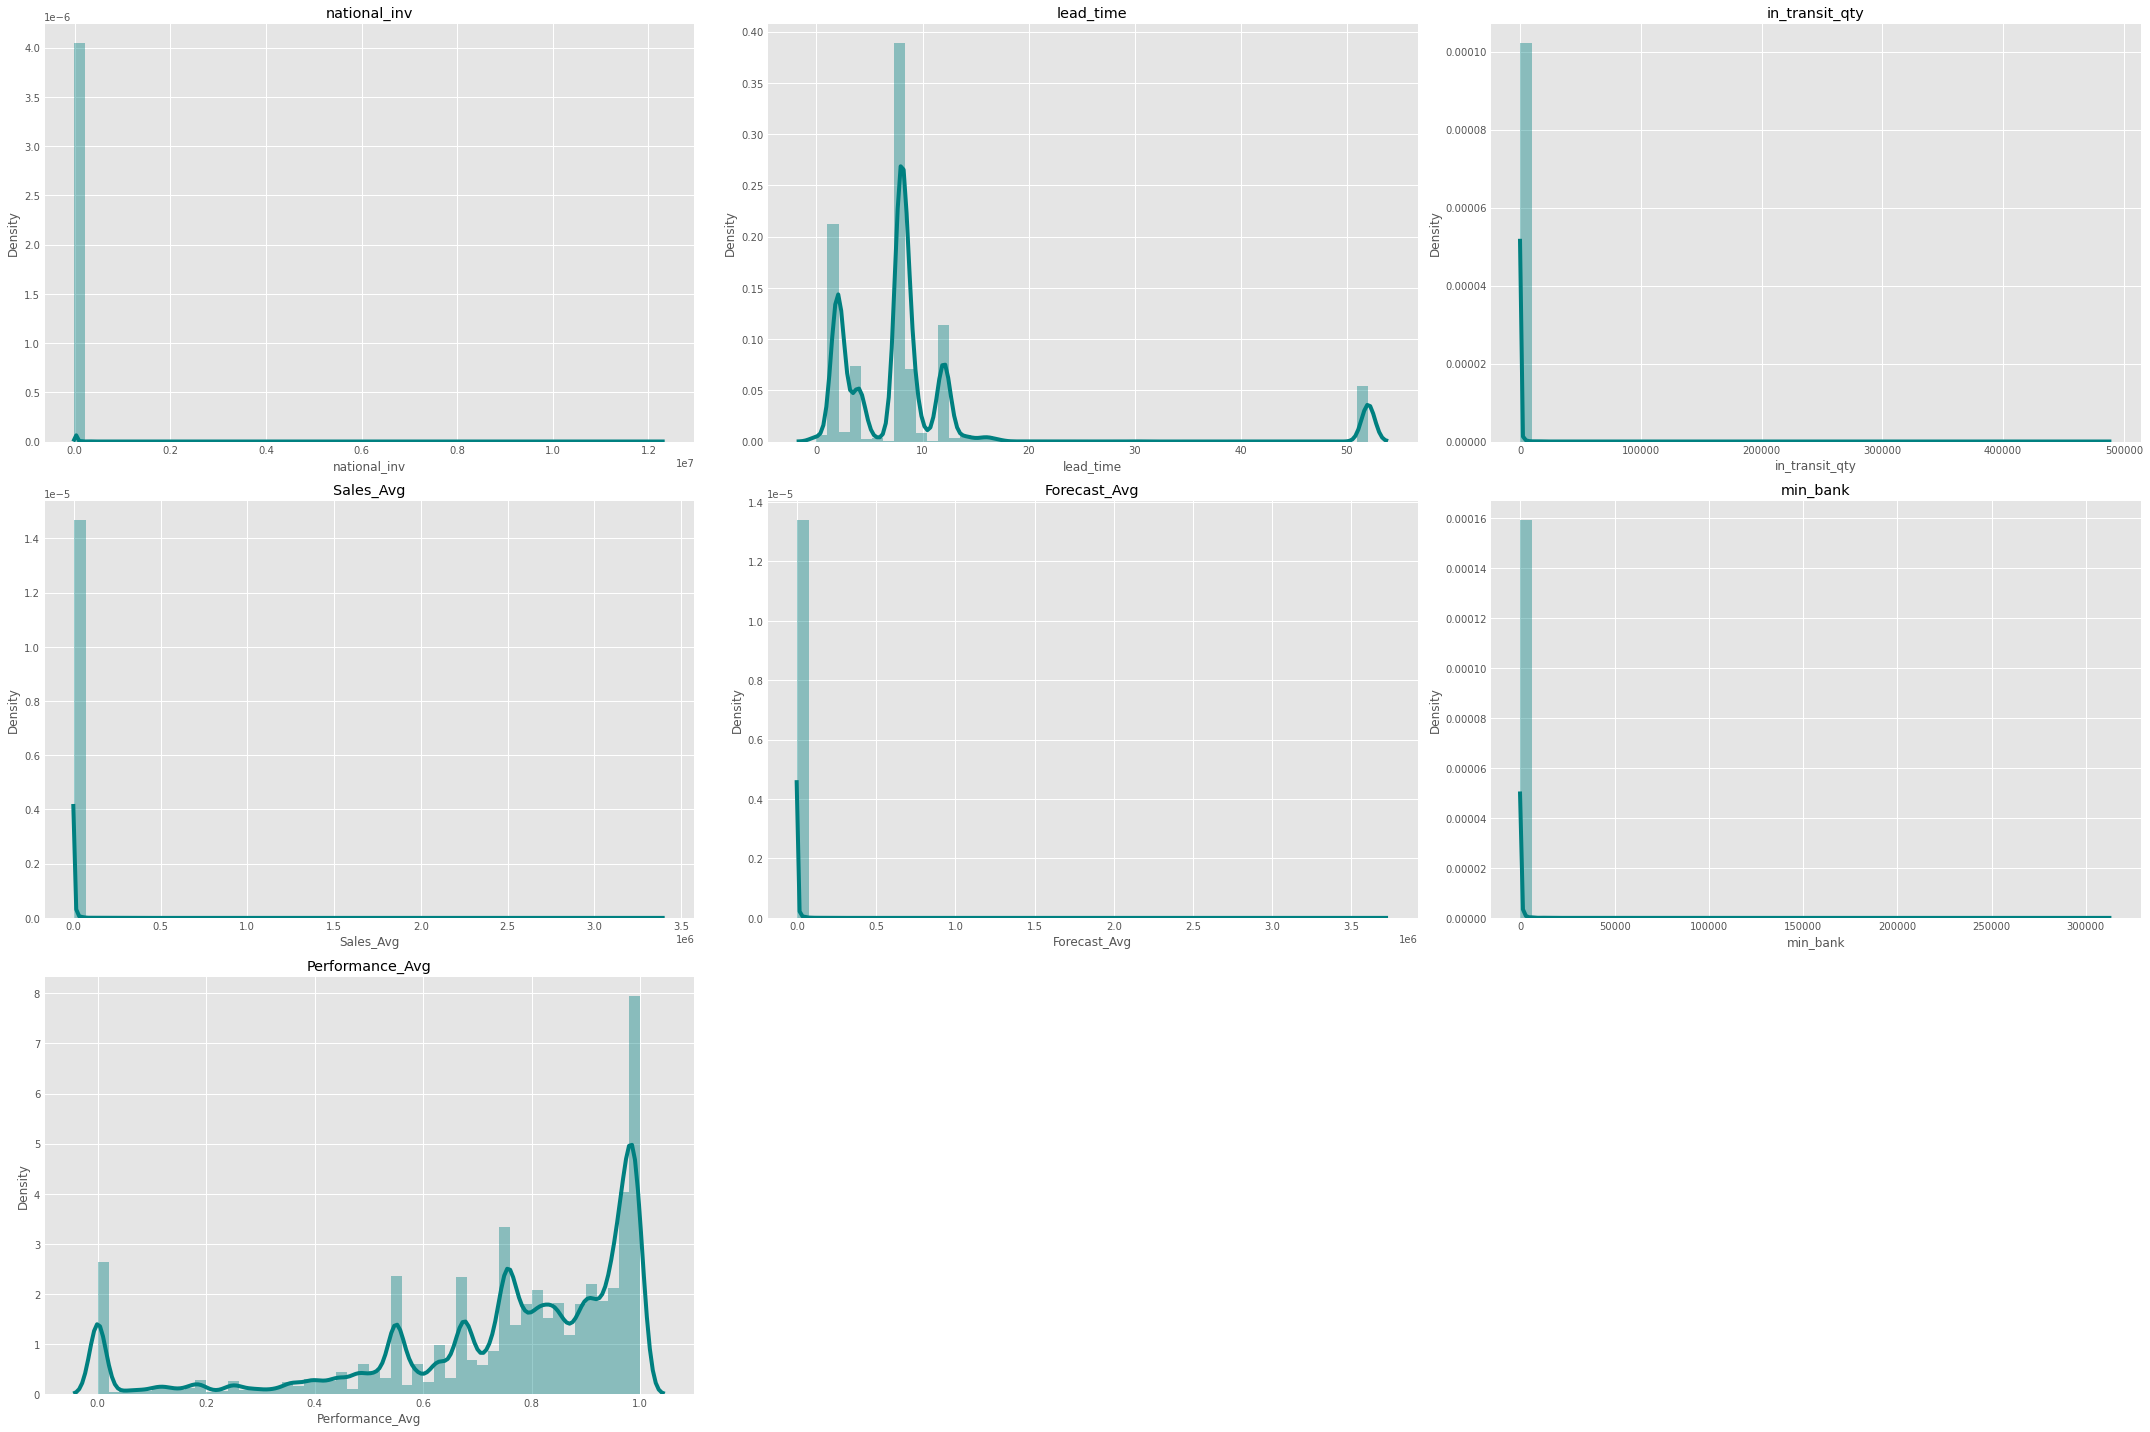

CPU times: user 25.8 s, sys: 2.55 s, total: 28.3 s
Wall time: 19.6 s


In [136]:
%%time

nrow = 3
ncols = 3
iterator = 1

plt.figure(figsize=(30,20))
for i in num_cols:
    plt.subplot(nrow,ncols,iterator)
    sns.distplot(newtrain[i],kde=True,color='teal')
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

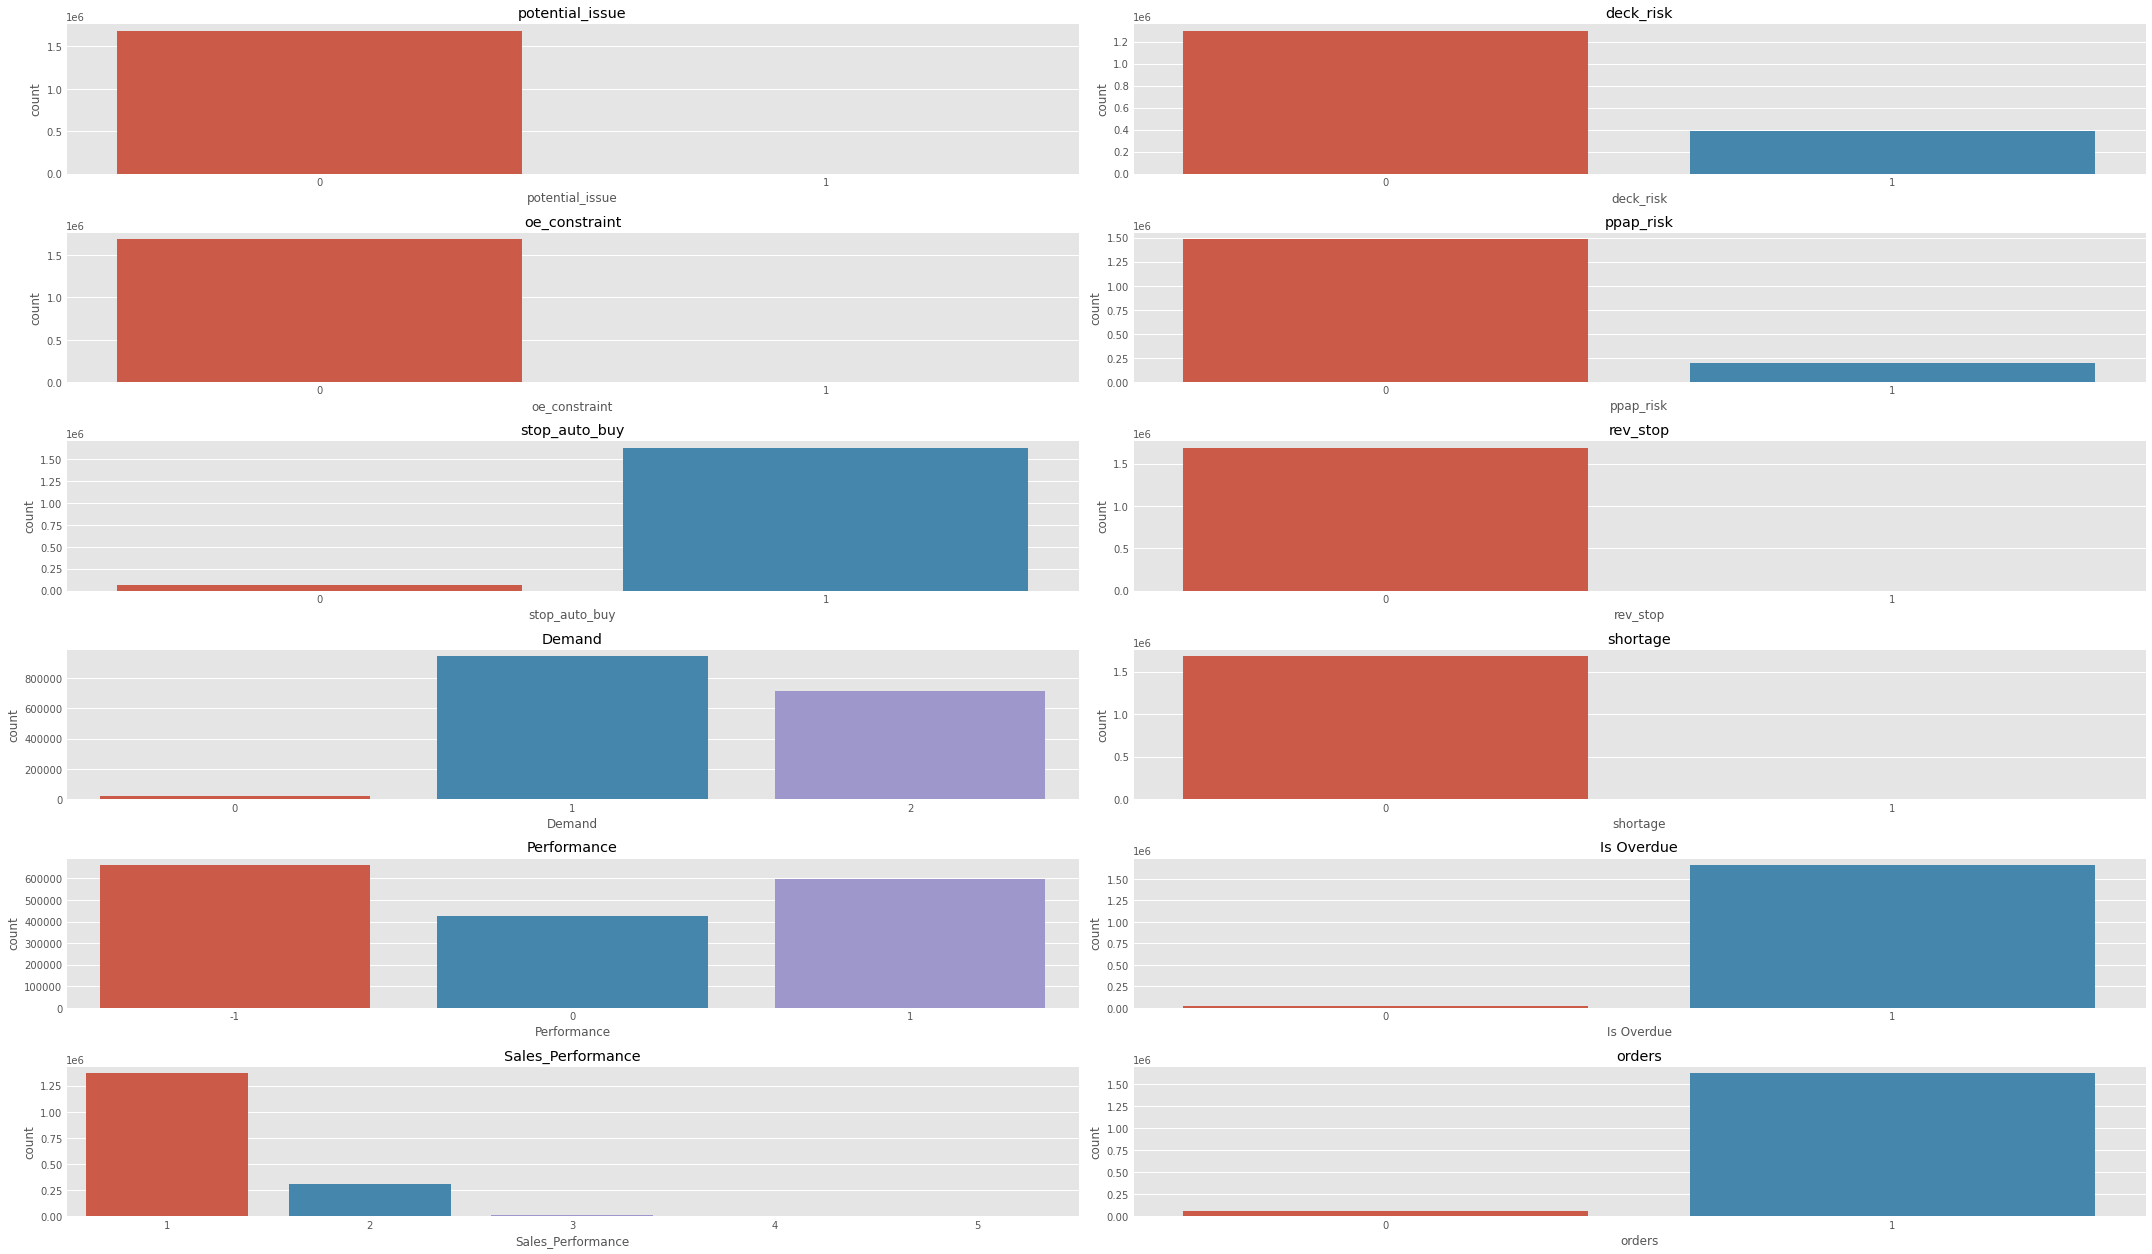

CPU times: user 1.4 s, sys: 76.9 ms, total: 1.47 s
Wall time: 1.55 s


In [137]:
%%time

nrow = 7
ncols = 2
iterator = 1

plt.figure(figsize=(30,20))
for i in cat_cols:
    plt.subplot(nrow,ncols,iterator)
    sns.countplot(newtrain[i])
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS

- Categorical vs Categorical

<Figure size 432x432 with 0 Axes>

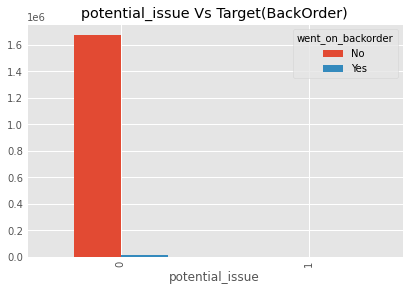

<Figure size 432x432 with 0 Axes>

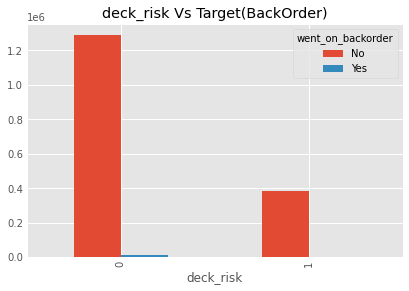

<Figure size 432x432 with 0 Axes>

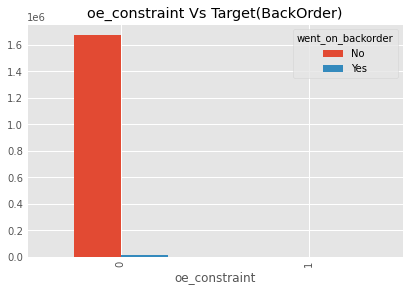

<Figure size 432x432 with 0 Axes>

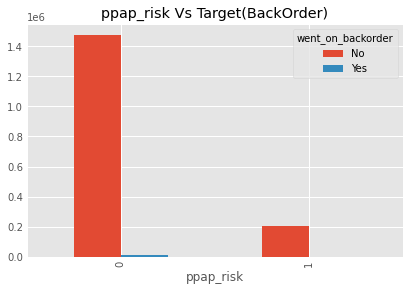

<Figure size 432x432 with 0 Axes>

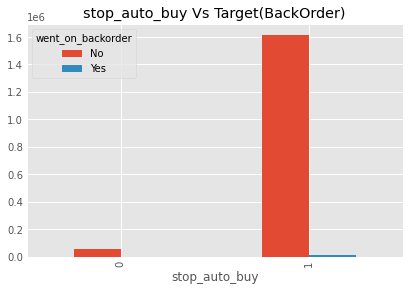

<Figure size 432x432 with 0 Axes>

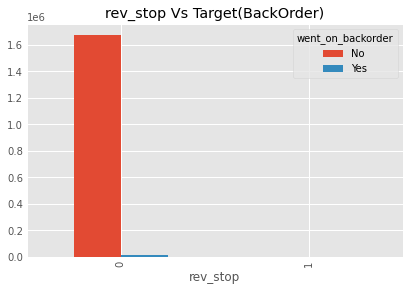

<Figure size 432x432 with 0 Axes>

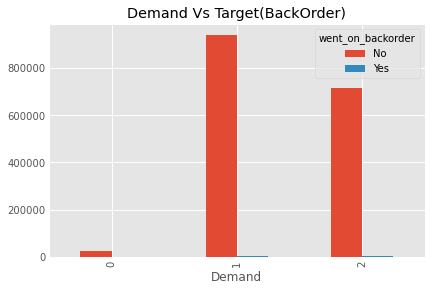

<Figure size 432x432 with 0 Axes>

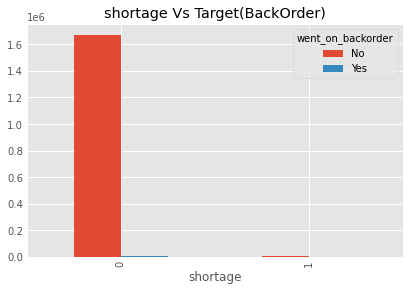

<Figure size 432x432 with 0 Axes>

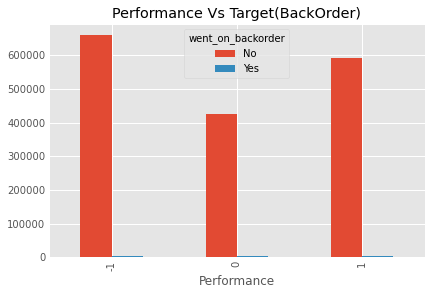

<Figure size 432x432 with 0 Axes>

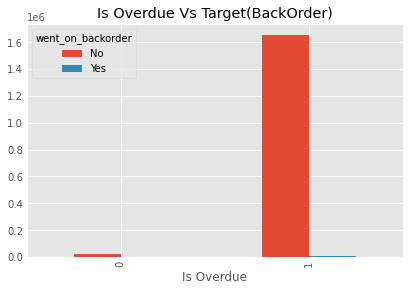

<Figure size 432x432 with 0 Axes>

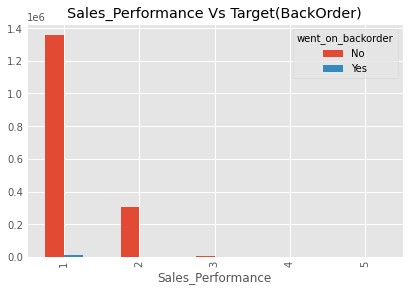

<Figure size 432x432 with 0 Axes>

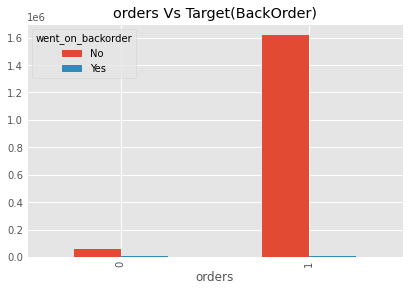

In [138]:
for i in cat_cols:
    plt.figure(figsize=(6,6))
    a = pd.crosstab(index=newtrain[i],columns=newtrain.went_on_backorder)
    a.plot(kind='bar')
    plt.title(f'{i} Vs Target(BackOrder)')
    plt.show()

- Numerical vs Categorical

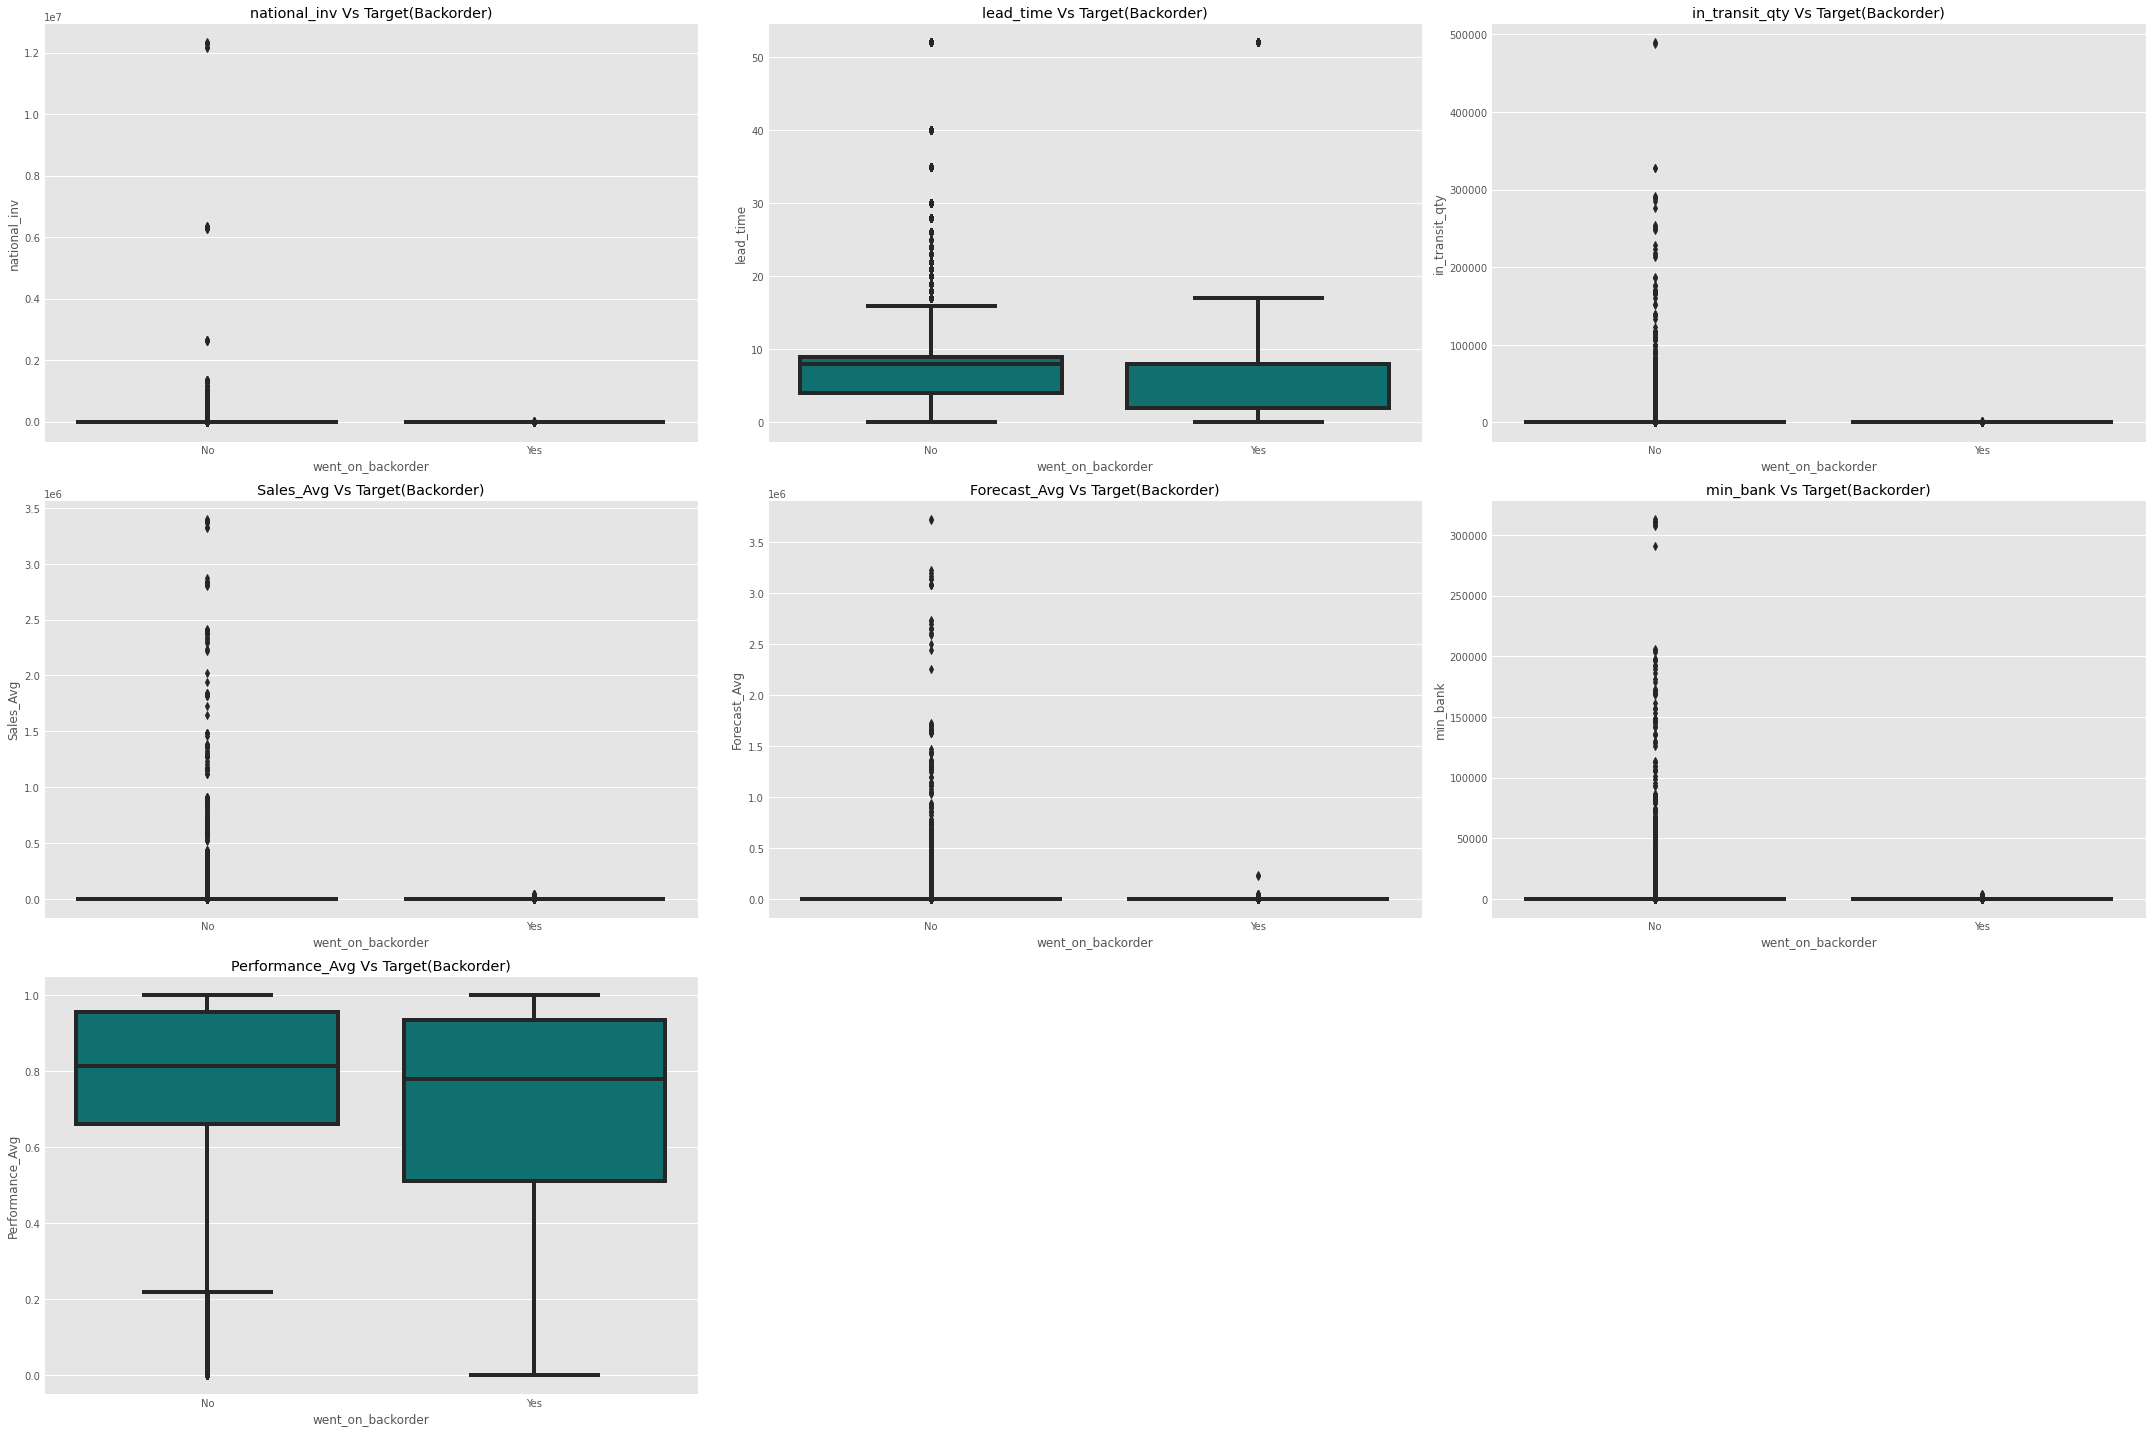

CPU times: user 4.77 s, sys: 105 ms, total: 4.88 s
Wall time: 4.9 s


In [139]:
%%time

nrow = 3
ncols = 3
iterator = 1

plt.figure(figsize=(30,20))
for i in num_cols:
    plt.subplot(nrow,ncols,iterator)
    sns.boxplot(y = newtrain[i],x=newtrain.went_on_backorder,color='teal')
    plt.title(f'{i} Vs Target(Backorder)')
    iterator+=1
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

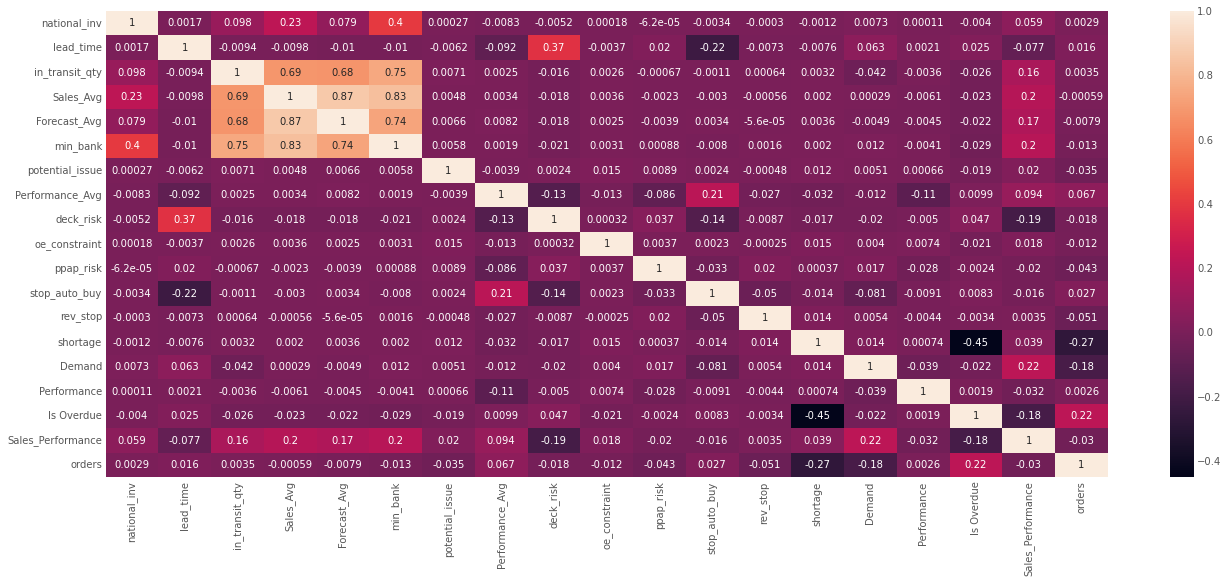

In [140]:
plt.figure(figsize=[20,8])
sns.heatmap(newtrain.corr(),annot=True)

# Statistal Tests For Feature Significance

In [307]:
import scipy.stats as stats

- Checking for normality : Shapiro

In [308]:
Feature = []
Normality = []
P_value = []
for i in num_cols:
    s,p = stats.shapiro(newtrain[i])
    if p < 0.05:
        P_value.append(p)
        Feature.append(i)
        Normality.append("Column is not normally distributed")
        
    else:
        P_value.append(p)
        Feature.append(i)
        Normality.append("Column is normally distributed")
shapiro = pd.DataFrame({"Features":Feature,"P_value":P_value, "Normality":Normality})
shapiro

,Features,P_value,Normality
0,national_inv,0.0,Column is not normally distributed
1,lead_time,0.0,Column is not normally distributed
2,in_transit_qty,0.0,Column is not normally distributed
3,Sales_Avg,0.0,Column is not normally distributed
4,Forecast_Avg,0.0,Column is not normally distributed
5,min_bank,0.0,Column is not normally distributed
6,Performance_Avg,0.0,Column is not normally distributed


- We are proceeding with non - parametric test since the columns are not normally distributed.

### Non-Parametric Testing - Kruskal

- Numerical vs Categorical

In [309]:
from scipy.stats import kruskal

In [310]:
Feature = []
Statistic = []
P_value = []
Significance = []

for i in num_cols:
    Feature.append(i)
    m1=new_combined.loc[new_combined.went_on_backorder=='No',i]
    m2=new_combined.loc[new_combined.went_on_backorder=='Yes',i]
    stats, p = kruskal(m1,m2)
    Statistic.append(stats)
    P_value.append(round(p,2))
    if p < 0.05:
        Significance.append("Significant")
    else:
        Significance.append("Not Significant")
        
pd.DataFrame({"Features":Feature,"Statistic":Statistic,"P_value":P_value, "Significant":Significance})   

,Features,Statistic,P_value,Significant
0,national_inv,12923.040900,0.00,Significant
1,lead_time,1028.350181,0.00,Significant
2,in_transit_qty,501.063688,0.00,Significant
3,Sales_Avg,2326.974246,0.00,Significant
4,Forecast_Avg,10528.208829,0.00,Significant
5,min_bank,3.871903,0.05,Significant
6,Performance_Avg,462.526412,0.00,Significant


### Parametric Testing - Chi2_contingency 
- Categorical vs Categorical

In [311]:
from scipy.stats import chi2_contingency
scol=[]
spval=[]
ss=[]
for n in cat_cols:
    scol.append(n)
    cp=chi2_contingency(pd.crosstab(newtrain[n],newtrain['went_on_backorder']))[1]
    spval.append(round(cp,4))
    if cp<0.05:
        ss.append('Significant')
    else:
        ss.append('Insignificant')
        
pd.DataFrame({'Features':scol,'P-Value :':spval,'Significance ':ss})

,Features,P-Value :,Significance
0,potential_issue,0.0000,Significant
1,deck_risk,0.0000,Significant
2,oe_constraint,0.0000,Significant
3,ppap_risk,0.0000,Significant
4,stop_auto_buy,0.0018,Significant
5,rev_stop,0.0463,Significant
6,Demand,0.0000,Significant
7,shortage,0.0000,Significant
8,Performance,0.0000,Significant
9,Is Overdue,0.0000,Significant


###  Spliting train data into X,Y

In [312]:
xtrain = newtrain.drop("went_on_backorder",1)
ytrain = newtrain.went_on_backorder

In [313]:
mapp = {'Yes':1,'No':0}

In [314]:
ytrain_enc = ytrain.map(mapp)

In [315]:
test_target.dropna(inplace=True)

In [316]:
ytest = test_target.map(mapp)

In [317]:
pd.to_numeric(ytest,downcast='integer')

0         0
1         0
2         0
3         0
4         0
         ..
242070    0
242071    0
242072    0
242073    0
242074    0
Name: went_on_backorder, Length: 242075, dtype: int8

### SMOTE for handling Imbalance

In [318]:
from imblearn.over_sampling import SMOTE

In [328]:
sm = SMOTE(sampling_strategy=0.40)

smoteX,smoteY = sm.fit_resample(xtrain,ytrain_enc)
smoteY.value_counts(normalize=True)

0    0.714286
1    0.285714
Name: went_on_backorder, dtype: float64

In [329]:
from collections import Counter

print(f'Before UpSampling {Counter(ytrain)}')
print()
print(f'After Upsampling {Counter(smoteY)}')

Before UpSampling Counter({'No': 1676567, 'Yes': 11293})

After Upsampling Counter({0: 1676567, 1: 670626})


In [330]:
xtrain.shape,smoteX.shape

((1687860, 19), (2347193, 19))

## MODEL BUILDING

In [405]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

# Base Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# Advanced Models
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier

## EVALUATION METRICS

In [361]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

def plot_confusion_matrix(pred):
    plt.figure(figsize=[5,5])
    cm = confusion_matrix(ytest, pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
Performance = pd.DataFrame( columns=['Method','Model_Name','IsSampled',"Type I errors","Type II errors",'Accuracy','Avg Precision','Avg Recall','F1-Score',"ROC AUC"])
def Append(a):
    app ={}
    for i,j in zip(['Method','Model_Name','IsSampled',"Type I errors","Type II errors",'Accuracy','Avg Precision','Avg Recall','F1-Score',"ROC AUC"] , a):
        app[i] = j
    global Performance
    Performance = Performance.append(app,ignore_index=True)
    return Performance

def eval_models(model):
    cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    scores = cross_val_score(estimator=model,X=smoteX,y=smoteY,
                            scoring="f1", cv=cv,
                            error_score="raise",
                            n_jobs= -1)
    return scores


### BASE MODELS

In [362]:
Dt = DecisionTreeClassifier(class_weight="balanced")
lr = LogisticRegression(class_weight="balanced")

##### Imbalanced Data

- Benchmark Evaluation Model : No Backorder Scenario

In [363]:
base_pred_bm = pd.Series(np.zeros(242075)).astype("int")

In [364]:
print("Confusion:",confusion_matrix(ytest,base_pred_bm),end="\n\n")
print("Accuracy Test:",accuracy_score(ytest,base_pred_bm),end="\n\n")
print("Classification Report:\n",classification_report(ytest,base_pred_bm),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,base_pred_bm))

Confusion: [[239387      0]
 [  2688      0]]

Accuracy Test: 0.9888960033047609

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    239387
           1       0.00      0.00      0.00      2688

    accuracy                           0.99    242075
   macro avg       0.49      0.50      0.50    242075
weighted avg       0.98      0.99      0.98    242075


AUC Test:  0.5


- Decision Tree, Logistic Regression

In [352]:
Base_tree_lr = lr.fit(xtrain,ytrain_enc)
ypred_lr = Base_tree_lr.predict(newtest)
yprob_lr = Base_tree_lr.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_lr),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Base_tree_lr.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_lr),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_lr),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_lr))

In [366]:
Append(['Base Model','Logistic Regression','No',51554,1386,78,51,63,46,63])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63


In [337]:
Base_tree_dt = Dt.fit(xtrain,ytrain_enc)
ypred_dt = Base_tree_dt.predict(newtest)
yprob_dt = Base_tree_dt.predict_proba(newtest)

In [350]:
print("Confusion:",confusion_matrix(ytest,ypred_dt),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Base_tree_dt.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_dt),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_dt),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_dt))

Confusion: [[238234   1153]
 [  2466    222]]

Accuracy Train:  0.9958888770395649
Accuracy Test: 0.985050087782712

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    239387
           1       0.16      0.08      0.11      2688

    accuracy                           0.99    242075
   macro avg       0.58      0.54      0.55    242075
weighted avg       0.98      0.99      0.98    242075


AUC Test:  0.5388864084918682


In [369]:
Append(['Base Model','Decision Tree','No',1153,2466,98,58,54,55,54])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54


##### Balanced Data

- Decision Tree, Logistic Regression

In [358]:
Base_tree_lr_b = lr.fit(smoteX,smoteY)
ypredlr_b = Base_tree_lr_b.predict(newtest)
yproblr_b = Base_tree_lr_b.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypredlr_b),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Base_tree_lr_b.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypredlr_b),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypredlr_b),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypredlr_b))


In [ ]:
Append(['Base Model','Logistic Regression','Yes',31922,1540,86,51,65,49,65])

In [355]:
Base_tree_dt_b = Dt.fit(smoteX,smoteY)
ypred_dt_b = Base_tree_dt_b.predict(newtest)
yprob_dt_b = Base_tree_dt_b.predict_proba(newtest)

In [356]:
print("Confusion:",confusion_matrix(ytest,ypred_dt_b),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Base_tree_dt.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_dt_b),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_dt_b),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_dt_b))

Confusion: [[237943   1444]
 [  2421    267]]

Accuracy Train:  0.9958888770395649
Accuracy Test: 0.9840338737994423

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.16      0.10      0.12      2688

    accuracy                           0.98    242075
   macro avg       0.57      0.55      0.56    242075
weighted avg       0.98      0.98      0.98    242075


AUC Test:  0.5466491417774506


In [370]:
Append(['Base Model','Decision Tree','Yes',1444,2421,98,57,55,56,55])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55


In [2]:
Dt = DecisionTreeClassifier()

param_grid = {'min_samples_leaf':list(range(1,5,1)),
             'min_samples_split':list(range(2,10,2)),
             'max_depth':[2,3,4,5,None],
             'max_features': [0.2],
             'criterion':['gini','entropy']}

n_folds = 5

cv = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid,cv = n_folds,verbose = 3,n_jobs=-1,
                 scoring='f1score')

NameError: name 'DecisionTreeClassifier' is not defined

### ADVANCED MODELS ON BALANCED DATA

In [373]:
def base_models():
    models = dict()
    models["bgc"] = BaggingClassifier()
    models["adaboost"] = AdaBoostClassifier()
    models["gbm"] = GradientBoostingClassifier()
    models["xgb"] = XGBClassifier()
    models["rf"] = RandomForestClassifier()
    models["etree"] = ExtraTreeClassifier()
    return models
models = base_models()
models

{'bgc': BaggingClassifier(),
 'adaboost': AdaBoostClassifier(),
 'gbm': GradientBoostingClassifier(),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'rf': RandomForestClassifier(),
 'etree': ExtraTreeClassifier()}

In [378]:
#List for result and model names
result, names = list(),list()
for name , model in models.items():
    scores = eval_models(model) 
    result.append(scores) #this will save the f1 scores
    names.append(name) #this will save the name of the model

In [379]:
for i,j in zip(names,result):
    print(">%s %.3f (%.3f)" % (f"{i} :" , np.mean(j), np.std(j)))

>bgc : 0.986 (0.000)
>adaboost : 0.814 (0.002)
>gbm : 0.850 (0.001)
>xgb : 0.941 (0.001)
>rf : 0.989 (0.000)
>etree : 0.973 (0.001)


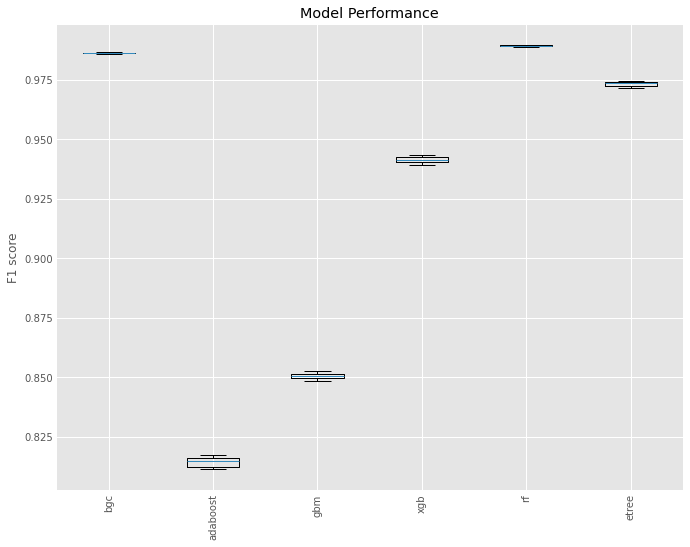

In [383]:
plt.figure(figsize=[10,8])
plt.boxplot(result, labels = names)
plt.xticks(rotation = 90)
plt.ylabel("F1 score")
plt.title("Model Performance")
plt.show()

### Final Models

In [384]:
bgc = BaggingClassifier()
bgc_mod = bgc.fit(smoteX,smoteY)
ypred_bgc = bgc_mod.predict(newtest)
yprob_bgc = bgc_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_bgc),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_bgc),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_bgc),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_bgc))

Confusion: [[238605    782]
 [  2494    194]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9864670040276774

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    239387
           1       0.20      0.07      0.11      2688

    accuracy                           0.99    242075
   macro avg       0.59      0.53      0.55    242075
weighted avg       0.98      0.99      0.98    242075


AUC Test:  0.5344529710384281


In [387]:
Append(['Final','Bagging Classifier','Yes',782,2494,98,59,53,55,53])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53


In [385]:
gbm = GradientBoostingClassifier()
gbm_mod = gbm.fit(smoteX,smoteY)
ypred_gbm = gbm_mod.predict(newtest)
yprob_gbm = gbm_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_gbm),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_gbm),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_gbm),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_gbm))

Confusion: [[228559  10828]
 [  1080   1608]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9508086336879067

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    239387
           1       0.13      0.60      0.21      2688

    accuracy                           0.95    242075
   macro avg       0.56      0.78      0.59    242075
weighted avg       0.99      0.95      0.97    242075


AUC Test:  0.7764910442385878


In [388]:
Append(['Final','Gradient Boosting Classifier','Yes',10828,1080,95,56,78,59,77])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77


In [386]:
xgb = XGBClassifier()
xgb_mod = xgb.fit(smoteX,smoteY)
ypred_xgb = xgb_mod.predict(newtest)
yprob_gb = xgb_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_xgb),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_xgb),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_xgb),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_xgb))

Confusion: [[235085   4302]
 [  1686   1002]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9752638645048022

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    239387
           1       0.19      0.37      0.25      2688

    accuracy                           0.98    242075
   macro avg       0.59      0.68      0.62    242075
weighted avg       0.98      0.98      0.98    242075


AUC Test:  0.6773984782336909


In [390]:
Append(['Final','XGB Classifier','Yes',4302,1686,98,59,68,62,67])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77
6,Final,XGB Classifier,Yes,4302,1686,98,59,68,62,67


In [389]:
rf = RandomForestClassifier()
rf_mod = rf.fit(smoteX,smoteY)
ypred_rf = rf_mod.predict(newtest)
yprob_rf = rf_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_rf),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_rf),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_rf),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_rf))

Confusion: [[238810    577]
 [  2532    156]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9871568728699783

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    239387
           1       0.21      0.06      0.09      2688

    accuracy                           0.99    242075
   macro avg       0.60      0.53      0.54    242075
weighted avg       0.98      0.99      0.98    242075


AUC Test:  0.5278126956261499


In [391]:
Append(['Final','Random Forest Classifier','Yes',577,2532,99,60,53,54,52])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77
6,Final,XGB Classifier,Yes,4302,1686,98,59,68,62,67
7,Final,Random Forest Classifier,Yes,577,2532,99,60,53,54,52


In [392]:
etree = ExtraTreeClassifier()
etree_mod = etree.fit(smoteX,smoteY)
ypred_etree = etree_mod.predict(newtest)
yprob_etree = etree_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_etree),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_etree),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_etree),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_etree))

Confusion: [[237258   2129]
 [  2404    284]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9812743984302386

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.12      0.11      0.11      2688

    accuracy                           0.98    242075
   macro avg       0.55      0.55      0.55    242075
weighted avg       0.98      0.98      0.98    242075


AUC Test:  0.5483806064825894


In [393]:
Append(['Final','Extra Tree Classifier','Yes',2129,2404,98,55,55,55,54])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77
6,Final,XGB Classifier,Yes,4302,1686,98,59,68,62,67
7,Final,Random Forest Classifier,Yes,577,2532,99,60,53,54,52
8,Final,Extra Tree Classifier,Yes,2129,2404,98,55,55,55,54


In [374]:
abc = AdaBoostClassifier()
Smote_mod = abc.fit(smoteX,smoteY)
ypred = Smote_mod.predict(newtest)
yprob = Smote_mod.predict_proba(newtest)

In [376]:
print("Confusion:",confusion_matrix(ytest,ypred),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred))

Confusion: [[225123  14264]
 [  1078   1610]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9366229474336466

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    239387
           1       0.10      0.60      0.17      2688

    accuracy                           0.94    242075
   macro avg       0.55      0.77      0.57    242075
weighted avg       0.99      0.94      0.96    242075


AUC Test:  0.7696864043195051


In [394]:
Append(['Final','Ada Boost','Yes',14264,1078,94,55,77,57,76])

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77
6,Final,XGB Classifier,Yes,4302,1686,98,59,68,62,67
7,Final,Random Forest Classifier,Yes,577,2532,99,60,53,54,52
8,Final,Extra Tree Classifier,Yes,2129,2404,98,55,55,55,54
9,Final,Ada Boost,Yes,14264,1078,94,55,77,57,76


In [401]:
Performance.sort_values(by="F1-Score",ascending=False)

,Method,Model_Name,IsSampled,Type I errors,Type II errors,Accuracy,Avg Precision,Avg Recall,F1-Score,ROC AUC
6,Final,XGB Classifier,Yes,4302,1686,98,59,68,62,67
5,Final,Gradient Boosting Classifier,Yes,10828,1080,95,56,78,59,77
9,Final,Ada Boost,Yes,14264,1078,94,55,77,57,76
3,Base Model,Decision Tree,Yes,1444,2421,98,57,55,56,55
2,Base Model,Decision Tree,No,1153,2466,98,58,54,55,54
4,Final,Bagging Classifier,Yes,782,2494,98,59,53,55,53
8,Final,Extra Tree Classifier,Yes,2129,2404,98,55,55,55,54
7,Final,Random Forest Classifier,Yes,577,2532,99,60,53,54,52
1,Base Model,Logistic Regression,Yes,31922,1540,86,51,65,49,65
0,Base Model,Logistic Regression,No,51554,1386,78,51,63,46,63


In [1]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(smoteX,smoteY)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

NameError: name 'XGBClassifier' is not defined

In [403]:
xgb = XGBClassifier(max_depth = 10, gamma = 1)
xgb_mod = xgb.fit(smoteX,smoteY)
ypred_xgb = xgb_mod.predict(newtest)
yprob_gb = xgb_mod.predict_proba(newtest)
print("Confusion:",confusion_matrix(ytest,ypred_xgb),end="\n\n")
print("Accuracy Train: ",accuracy_score(ytrain_enc,Smote_mod.predict(xtrain)))
print("Accuracy Test:",accuracy_score(ytest,ypred_xgb),end="\n\n")
print("Classification Report:\n",classification_report(ytest,ypred_xgb),end="\n\n")
print("AUC Test: ",roc_auc_score(ytest,ypred_xgb))

Confusion: [[238085   1302]
 [  2273    415]]

Accuracy Train:  0.9361836882205871
Accuracy Test: 0.9852318496333781

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    239387
           1       0.24      0.15      0.19      2688

    accuracy                           0.99    242075
   macro avg       0.62      0.57      0.59    242075
weighted avg       0.98      0.99      0.98    242075


AUC Test:  0.5744754945580747


In [ ]:
# base_learners = [('XGB_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
#                                                      max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
#                                                      n_estimators = 50, random_state = 10)),
#                  ('GBM_model', ()),
#                  ('ADA_model', GaussianNB())]

# # initialize stacking classifier 
# # pass the base learners to the parameter, 'estimators'
# # pass the Naive Bayes model as the 'final_estimator'/ meta model
# stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# # fit the model on train dataset
# stack_model.fit(X_train, y_train)